### Lecture 3. Data Manipulation with Pandas

- In lecture 2: Numpy ndarray
    * efficient storage and manipulation of dense typed array
- In lecture 3: Pandas ``Index``, ``Series``, and ``DataFrame``
    * built on numpy ndarray with row (and col) labels
        * originally for financial data
        * good for handling time series data
    * flexibility
        * mixed data types
        * missing data allowed
    * connection to DB or spreadsheets
    * most useful among those : <font color="red">TAQ</font>[<font color="white"> DataFrame </font>]

In [1]:
import numpy as np
import pandas as pd

## 3-1. The Pandas Index Object

- ``Series`` and ``DataFrame`` contain *index*
    * index to reference and modify data.
    * ``Series`` has 1 *index*
    * ``DataFrame`` has 2 *index*
        - ``index`` for row index
        - ``columns`` for col index
- ``Index`` object can be viewed 
    * as an *immutable array* 
    * as an *ordered set* 
        - technically it is a multi-set, as ``Index`` objects may contain repeated values

In [2]:
ind = pd.Index([2, 3, 5, 7, 11])
print (ind)
print (ind.size, ind.shape, ind.ndim, ind.dtype)

Int64Index([2, 3, 5, 7, 11], dtype='int64')
5 (5,) 1 int64


### Index as immutable array
- ``Index`` in many ways operates like an ``tuple``
    - simple indexing
    - slicing
    - immutable

In [3]:
print (ind[1])
print (ind[::2])

3
Int64Index([2, 5, 11], dtype='int64')


In [ ]:
# index is immutable, so cannot be modified
ind[1] = 0

### Index as ordered set

- ``Index`` in many ways operates like an ``set``
    - union, intersection, difference, ...
    - ordered-set 
        * implemented using BST
    - multiple entry is allowed

In [5]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 7, 7, 11])
print (indA)
print (indB)

Int64Index([1, 3, 5, 7, 9], dtype='int64')
Int64Index([2, 3, 7, 7, 11], dtype='int64')


In [6]:
indA.intersection(indB)  # intersection

Int64Index([3, 7], dtype='int64')

In [7]:
indA.union(indB)  # union

Int64Index([1, 2, 3, 5, 7, 7, 9, 11], dtype='int64')

In [8]:
indA.difference(indB)  # difference

Int64Index([1, 5, 9], dtype='int64')

In [9]:
indA.symmetric_difference(indB)  # XOR

Int64Index([1, 2, 5, 9, 11], dtype='int64')

## 3-2. Pandas Series object
- ``Series``: 1-d array with generalized index
    * typed value: 1-d numpy array
    * typed index: array of specific types
        * default index: RangeIndex(start, stop, step) - integer index
        * can be used with named index
    * underlying mechanism uses numpy array
    * it acts like a dict

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print (data)
print ("data.values=", data.values)
print ("data.index =", data.index)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
data.values= [0.25 0.5  0.75 1.  ]
data.index = RangeIndex(start=0, stop=4, step=1)


In [11]:
print(data[1])
print(data[1:3])

0.5
1    0.50
2    0.75
dtype: float64


In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
print (data)
print (data['b'])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5


### Series as a specialized dict
- ``pd.Series`` can be viewed as <font color="red">TAQ</font>[<font color="white">   dictionary   </font>] 
    * typed index 
    * typed value
- in fact, ``pd.Series`` is a little more than that

In [13]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print (population,'\n')
print (population['California'])

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64 

38332521


- Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [14]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects
- General form of Series construction
```python
>>> pd.Series(data, index=index)
```
* ``data`` can be one of many entities, such as list or NumPy array
* ``index`` is an optional argument

In [15]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

``data`` can be a scalar, which is repeated to fill the specified index:

In [16]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

``data`` can be a dictionary, in which ``index`` defaults to the sorted dictionary keys:

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

#### Subset of keys can be specified:

In [18]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

In [19]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2, 1, 2, 3, 1])

3    c
2    a
1    b
2    a
3    c
1    b
dtype: object

## 3-3. The Pandas DataFrame Object
- ``Series`` : 1-d array with generalized index  
    * __values__: based on numpy 1-d array
    * __index__ : ordered set
    * mapping from index to values: mapping by order of elements
        - specialization of dict
- ``DataFrame`` : <font color="red">TAQ</font>[<font color="white">2</font>]-d array with generalized index
    * __values__: based on numpy 2-d array
    * __index__ : row index (ordered set)
    * __columns__ : column index  (ordered set)
    * mapping from columns to corresponding ``Series``
        - mapping by order of elements
        - specialization of dict

### DataFrame as a generalized NumPy array
- DataFrame can be viewed as
    * generalized Numpy (2-d) array (with named rows or columns)
    * specialized dict

In [20]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print (population)
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
print (area)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


In [21]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [22]:
# row index set
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [23]:
# column index set
states.columns

Index(['population', 'area'], dtype='object')

### DataFrame as specialized dictionary

- ``DataFrame``: a specialization of a dictionary.
    - mapping from a column name to ``Series`` of column data.

In [24]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [25]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

### Constructing DataFrame objects

A Pandas ``DataFrame`` can be constructed in a variety of ways.
Here we'll give several examples.

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [26]:
# single Series(column) DataFrame
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a dictionary of Series objects
- ``DataFrame`` from a dictionary of ``Series`` objects

In [27]:
data = pd.DataFrame({'population': population,
                     'area': area})
data

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### From a list of dicts
- ``DataFrame`` from a list of ``dict`` objects

In [28]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
print (data)  # 3 dict's
pd.DataFrame(data)

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]


,a,b
0,0,0
1,1,2
2,2,4


#### With missing values
- Pandas will fill missing values in with ``NaN`` (i.e., "not a number")

In [29]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a two-dimensional NumPy array

- ``DataFrame`` from 2-d array
    - column names and row names (index)
    - If omitted, an integer index will be used for each:

In [30]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.362212,0.498523
b,0.502027,0.930905
c,0.587546,0.904914


### Basic usages of DataFrame

In [31]:
import pandas as pd
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
states_T = pd.DataFrame([population_dict, area_dict], 
                        index=['population', 'area'])
states_T

,California,Texas,New York,Florida,Illinois
population,38332521,26448193,19651127,19552860,12882135
area,423967,695662,141297,170312,149995


In [32]:
states = states_T.T
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [33]:
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [34]:
states.values  # returns numpu array

array([[3.83325210e+07, 4.23967000e+05, 9.04139261e+01],
       [2.64481930e+07, 6.95662000e+05, 3.80187404e+01],
       [1.96511270e+07, 1.41297000e+05, 1.39076746e+02],
       [1.95528600e+07, 1.70312000e+05, 1.14806121e+02],
       [1.28821350e+07, 1.49995000e+05, 8.58837628e+01]])

In [35]:
# column selection --> returns a Series object
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [36]:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [37]:
# row selection by explicit index
states['California':'Florida']

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [38]:
# row selection by implicit index (by row number)
states[1:3]

,population,area,density
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746


In [39]:
states[states.density > 100]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [40]:
import numpy as np
np.log(states)

,population,area,density
California,17.461809,12.957411,4.504398
Texas,17.090698,13.452619,3.638079
New York,16.793645,11.858619,4.935026
Florida,16.788632,12.045387,4.743245
Illinois,16.371352,11.918357,4.452995


In [41]:
import copy
states_copy = copy.deepcopy(states)
states_copy['log-area'] = np.log(states_copy.area)
states_copy

,population,area,density,log-area
California,38332521,423967,90.413926,12.957411
Texas,26448193,695662,38.018740,13.452619
New York,19651127,141297,139.076746,11.858619
Florida,19552860,170312,114.806121,12.045387
Illinois,12882135,149995,85.883763,11.918357


### Missing data in Pandas
- filled with __NaN__ (``np.nan``, ``None``)
- __dropna()__ : row or column with Nan can be dropped

In [42]:
x = states + states_copy
x

,area,density,log-area,population
California,847934,180.827852,NaN,76665042
Texas,1391324,76.037481,NaN,52896386
New York,282594,278.153492,NaN,39302254
Florida,340624,229.612241,NaN,39105720
Illinois,299990,171.767526,NaN,25764270


In [43]:
# NaN is excluded from aggregation
x.mean(axis=1)

California    2.583772e+07
Texas         1.809593e+07
New York      1.319504e+07
Florida       1.314886e+07
Illinois      8.688144e+06
dtype: float64

In [86]:
y = x.dropna(axis=1)
y

,area,density,population
California,847934,180.827852,76665042
Texas,1391324,76.037481,52896386
New York,282594,278.153492,39302254
Florida,340624,229.612241,39105720
Illinois,299990,171.767526,25764270


In [ ]:
y['area']['Texas'] = np.nan
y

In [46]:
y.dropna()

,area,density,population
California,847934.0,180.827852,76665042
New York,282594.0,278.153492,39302254
Florida,340624.0,229.612241,39105720
Illinois,299990.0,171.767526,25764270


## 3-4. High dimensional data using ``MultiIndex`` 

- ``Series`` : 1-d data
- ``DataFrame`` : 2-d data
- ``Panel``, ``Panel4D`` :3-d, 4-d data
    * not so convenient
    * it is more common to use ``DataFrame`` with ``MultiIndex``

#### Consider a table like this: (it is in fact a 4-d data) 

|     | subject|    Bob    |   Guido   |    Sue    |  
| :-: |--------|-----------|-----------|-----------|  
|     |    type|  HR   Temp|  HR   Temp|  HR   Temp|   
|year |semester|           |           |           |  
| 2013|       1| 68.0  34.8| 66.0  30.7| 66.0  31.6|  
|     |       2| 63.0  37.9| 58.0  36.9| 65.0  34.7|  
| 2014|       1| 57.0  36.4| 68.0  35.0| 54.0  30.0|  
|     |       2| 63.0  35.4| 50.0  39.5| 70.0  31.3|  

In [47]:
# hierarchical indices for row
rows = pd.MultiIndex.from_arrays([[2013, 2013, 2014, 2014], 
                                  ['S', 'F', 'S', 'F']])
rows = pd.MultiIndex.from_tuples([(2013,'S'),(2013,'F'), 
                                  (2014,'S'),(2014,'F')]) 
rows = pd.MultiIndex.from_product([[2013, 2014], ['S', 'F']])
rows.names = ['year', 'semester']
rows

MultiIndex([(2013, 'S'),
            (2013, 'F'),
            (2014, 'S'),
            (2014, 'F')],
           names=['year', 'semester'])

In [48]:
# hierarchical indices for column
cols = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], 
                                  ['HR', 'Temp']])
cols.names = ['subject', 'type']
print (cols)

MultiIndex([(  'Bob',   'HR'),
            (  'Bob', 'Temp'),
            ('Guido',   'HR'),
            ('Guido', 'Temp'),
            (  'Sue',   'HR'),
            (  'Sue', 'Temp')],
           names=['subject', 'type'])


In [49]:
# mock some data
v = np.random.randint(300, 400, size=(4, 6)) / 10
v[:,::2] = np.round(v[:,::2]*2) - 10

# create the DataFrame
H = pd.DataFrame(v, index=rows, columns=cols)
H

subject         Bob       Guido         Sue      
type             HR  Temp    HR  Temp    HR  Temp
year semester                                    
2013 S         57.0  30.1  67.0  34.2  54.0  34.0
     F         68.0  35.9  54.0  36.3  61.0  36.5
2014 S         56.0  35.1  52.0  31.3  61.0  36.8
     F         61.0  30.3  57.0  38.8  51.0  31.9

In [50]:
H['Bob']

type             HR  Temp
year semester            
2013 S         57.0  30.1
     F         68.0  35.9
2014 S         56.0  35.1
     F         61.0  30.3

In [51]:
H['Bob'].HR[2013,'S']

57.0

In [52]:
print (H['Bob','Temp'],'\n')
print (H['Bob','Temp'][2013],'\n')
print (H['Bob','Temp'][:,'F'],'\n')
print (H['Bob','Temp'][2013,'F'],'\n')

year  semester
2013  S           30.1
      F           35.9
2014  S           35.1
      F           30.3
Name: (Bob, Temp), dtype: float64 

semester
S    30.1
F    35.9
Name: (Bob, Temp), dtype: float64 

year
2013    35.9
2014    30.3
Name: (Bob, Temp), dtype: float64 

35.9 



#### Regrouping data : <font color="red">TAQ</font>[<font color="white">   groupby   </font>]
- data rows in DataFrame (or Series) can be grouped based on index
- or columns in DataFrame can be grouped based on columns

##### __groupby__ takes steps <font color="red">TAQ</font>[<font color="white"> split, apply, combine </font>]
- input : DataFrame object
- input.groupby(``key``).``aggregate() ``
    * split by ``key`` : index
    * apply ``aggregate`` : sum(), mean(), max(), min(), ...
    * combine them as a DataFrame (or Series)
- input.groupby(``key``, axis=1).``aggregate() ``

![](figures/03.08-split-apply-combine.png)

In [53]:
H

subject         Bob       Guido         Sue      
type             HR  Temp    HR  Temp    HR  Temp
year semester                                    
2013 S         57.0  30.1  67.0  34.2  54.0  34.0
     F         68.0  35.9  54.0  36.3  61.0  36.5
2014 S         56.0  35.1  52.0  31.3  61.0  36.8
     F         61.0  30.3  57.0  38.8  51.0  31.9

In [54]:
print (H.groupby(level='semester').sum(),'\n')

subject     Bob        Guido          Sue      
type         HR  Temp     HR  Temp     HR  Temp
semester                                       
F         129.0  66.2  111.0  75.1  112.0  68.4
S         113.0  65.2  119.0  65.5  115.0  70.8 



In [55]:
H_mean = H.groupby(level='year').mean()
print (H_mean)

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     62.5  33.0  60.5  35.25  57.5  35.25
2014     58.5  32.7  54.5  35.05  56.0  34.35


In [56]:
print (H_mean.groupby(level='type', axis=1).max(), '\n')
print (H_mean.groupby(level='subject', axis=1).min(), '\n')

type    HR   Temp
year             
2013  62.5  35.25
2014  58.5  35.05 

subject   Bob  Guido    Sue
year                       
2013     33.0  35.25  35.25
2014     32.7  35.05  34.35 



## 3-5. Getting data from files

- pandas supports various file formats, including
    - __csv__ <font color="red">TAQ</font>[<font color="white"> (comma separated values) </font>]
    - __excel__
    - HTML
    - fixed width text file
    - JSON, LaTeX, HDF5, Python pickel, ...

### 3-5-1. Example : PCB data from CSV file to Excel file
- CSV file : comma separated values
    * text file containing values separated by comma (,)  
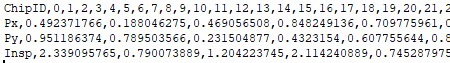    
    * ``pd.read_csv()``
    * ``pd.to_csv()``
- pcb.csv file contains
    * chip id
    * Px  : x-coordinate of each chip
    * Py  : y-coordinate of each chip
    * Insp: inspection time of each chip


In [57]:
pcb = pd.read_csv('data/pcb.csv', index_col=0)
pcb

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
ChipID,,,,,,,,,,,,,,,,,,,,,
Px,0.492372,0.188046,0.469057,0.848249,0.709776,0.528932,0.627842,0.432055,0.168861,0.471821,...,0.929329,0.068464,0.032277,0.849036,0.99192,0.930098,0.731222,0.672371,0.629595,0.748591
Py,0.951186,0.789504,0.231505,0.432315,0.607756,0.889992,0.528113,0.349996,0.851422,0.612010,...,0.370923,0.531964,0.431051,0.908680,0.58890,0.732085,0.188400,0.887789,0.971657,0.930530
Insp,2.339096,0.790074,1.204224,2.114241,0.745288,1.736367,1.570280,1.462471,2.289056,1.335301,...,1.140323,1.615072,0.736816,1.165590,1.72595,0.699088,1.946407,0.766608,0.580653,2.005252


##### DataFrame is column-major
- DataFrame is typically used as 
    * Column name : attribute name of a data entry
    * Row name : data entry index or time
- Columns can be accessed easily by column name
    * pcb['0'] : Series object with column '0'
    * pcb['5'] : Series object with column '5'
- Rows can be accessed in slicing form (note inclusive end here)
    * pcb['Px':'Px'] : DataFrame object having row 'Px' only
    * pcb['Px':'Py'] : DataFrame object having rows 'Px' and 'Py'
- Element can be accessed by <font color="red">TAQ</font>[<font color="white"> pcb[col][row] </font>]
    * pcb['2']['Insp']

In [58]:
print (pcb['0'])

ChipID
Px      0.492372
Py      0.951186
Insp    2.339096
Name: 0, dtype: float64


In [59]:
print (pcb['Px':'Px'])

               0         1         2         3         4         5         6  \
ChipID                                                                         
Px      0.492372  0.188046  0.469057  0.848249  0.709776  0.528932  0.627842   

               7         8         9  ...        40        41        42  \
ChipID                                ...                                 
Px      0.432055  0.168861  0.471821  ...  0.929329  0.068464  0.032277   

              43       44        45        46        47        48        49  
ChipID                                                                       
Px      0.849036  0.99192  0.930098  0.731222  0.672371  0.629595  0.748591  

[1 rows x 50 columns]


In [60]:
print (pcb['2']['Insp'])

1.204223745


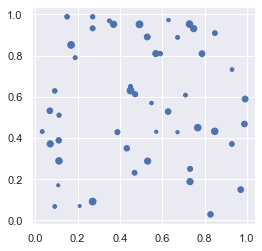

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set(rc = {'figure.figsize':(4,4)})
plt.scatter(pcb['Px':'Px'], pcb['Py':'Py'], s=20*pcb['Insp':'Insp'])

##### So, we can transpose a DataFrame
- in PCB example here, transposed DataFrame is more natural
- how : <font color="red">TAQ</font>[<font color="white"> pcb.T </font>]

In [ ]:
pcbT = pcb.T
pcbT

In [63]:
centroid = pcb.mean(axis=1)
print (f'Centroid x = {centroid["Px"]}, y = {centroid["Py"]}')

Centroid x = 0.4936363817600001, y = 0.5670219844400001


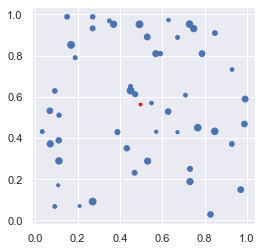

In [64]:
plt.scatter(pcbT['Px'], pcbT['Py'], s=20*pcbT['Insp'])
plt.scatter(centroid['Px'], centroid['Py'], facecolor='red', s=7);

#### values in DataFrame object can be directly manipulated
- pcb : DataFrame object 
- underlying numpy array (2-d) of df : <font color="red">TAQ</font>[<font color="white">   pcb.values   </font>] 
- underlying numpy array can be directly used

In [65]:
# Handling data with Numpy array
chip_N = pcb.shape[1]
chip_P = pcb.values[:2]
chip_Insp = pcb.values[2,:]
print (f'Mean inspection time = {chip_Insp.mean():.4f}')

Mean inspection time = 1.3699


### Excel file
- ``Excel`` : Microsoft Spreadsheet application software
- install openpyxl to read/write excel file
    - conda install openpyxl  
    - pip install openpyxl
- functions to read/write excel file
    - pd.read_excel()
    - pd.to_excel()

In [ ]:
# you may need to install openpyxl
# %pip install openpyxl
pcbT.to_excel('data/pcb.xlsx')
pcb_e = pd.read_excel('data/pcb.xlsx', index_col=0)
pcb_e

### 3-5-2. Example: Visualizing Seattle Bicycle Counts

- Bicycle count data in Seattle's [Fremont Bridge]
    * http://www.openstreetmap.org/#map=17/47.64813/-122.34965
    * from an automated bicycle counter
        - inductive sensors installed in 2012
        - counts # of passing bykes
        - on the east and west sidewalks of the bridge.
    * hourly bicycle counts data
        - https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)
        - data is provided and assumed to be in the folder './data'

In [67]:
# it is quite large, so it takes a while (like 20sec)
fbbc = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
fbbc.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [68]:
# let's use simpler column names
fbbc.columns = ['Total', 'West', 'East']
# fbbc.dropna()  # no NaN is included there
fbbc.describe()

,Total,West,East
count,143608.000000,143608.000000,143608.000000
mean,111.162735,50.547616,60.615119
std,141.443433,65.157096,87.921215
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,146.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


#### Visualizing the data
- data stored in csv file is not in chronological order
    - DataFrame.plot gathers rows based on row index, which is date-time
    - in increasing order of row index
- visualize using methods in DataFrame
    - plot() : plot values
        * row : horizontal axis
        * col : graph per each col.
    - resample(s) : down-sampling (or up-sampling)
        * '5T' : at every 5 min
        * '24H', '1D' : daily
        * 'W', '1W' : weekly
        * '3M' : at every 3 months
    - resample(s) .sum(), .mean(), ...
        * sum() : sum samples in the window

* Alias for resample frequency
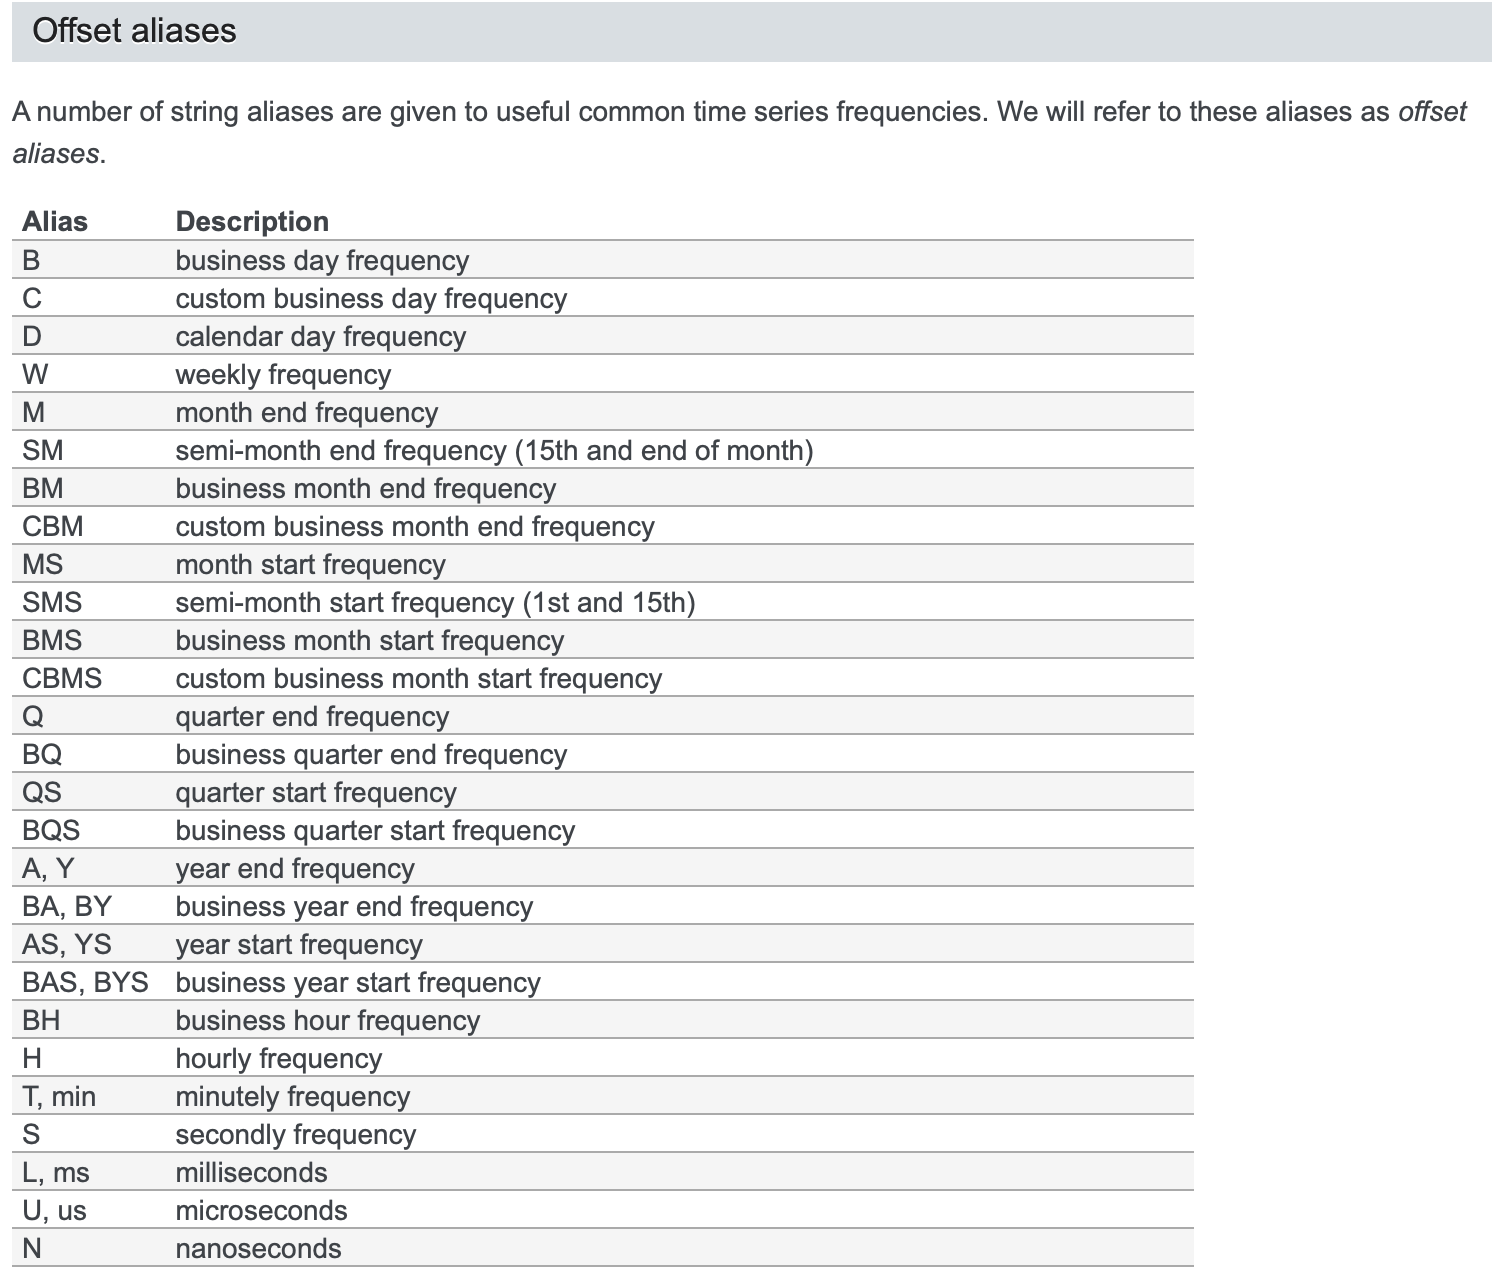

In [69]:
%matplotlib inline
import seaborn
seaborn.set(rc = {'figure.figsize':(9,5)})

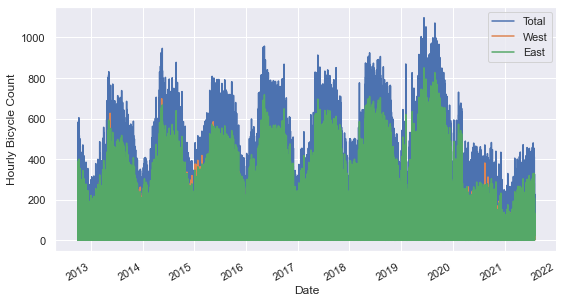

In [70]:
fbbc.plot()
plt.ylabel('Hourly Bicycle Count');

#### Down-sampling weekly data  <font color="red">TAQ</font>[<font color="white">  resample   </font>]

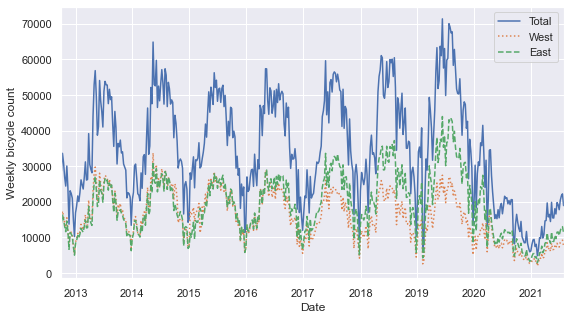

In [71]:
weekly = fbbc.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count');

#### Moving average <font color="red">TAQ</font>[<font color="white">   rolling   </font>]
- daily : Down-sample daily
- daily.rolling (30) : 30-day moving average

Text(0, 0.5, 'Mov. avg. daily count')

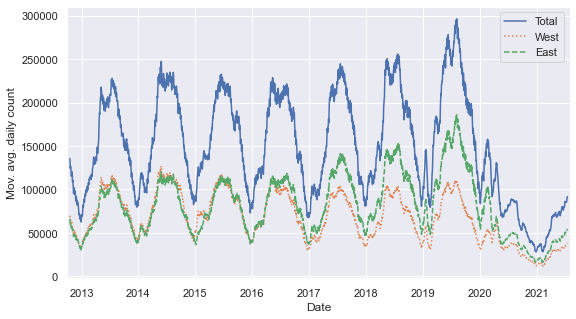

In [72]:
daily = fbbc.resample('D').sum()
ma_30d = daily.rolling(30, center=True).sum()
ma_30d.plot(style=['-', ':', '--'])
plt.ylabel('Mov. avg. daily count')

- Simple moving average : jagged
- Smoothing using Gaussian window function
    * width of window = 50 days
    * std of Gaussian = 10 days

Text(0, 0.5, 'Gaussian MA of daily count')

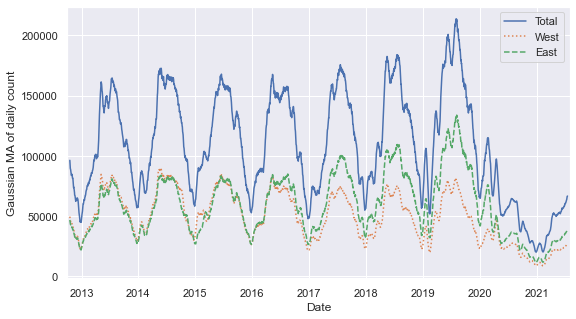

In [73]:
daily = fbbc.resample('D').sum()
ma_30d_G = daily.rolling(30, center=True, win_type='gaussian').sum(std=10)
ma_30d_G.plot(style=['-', ':', '--'])
plt.ylabel('Gaussian MA of daily count')

#### Question : is bike traffic uniform across time of day?
- to answer this, we need mean traffic data based on time of day
    * regrouping data : <font color="red">TAQ</font>[<font color="white">   groupby   </font>]
- in this data, row index is ``DateTimeIndex``, which has
    * date : year, month, day, dayofweek (=weekday)
    * time : hour, min, sec

In [ ]:
print ("index =\n", fbbc.index,'\n')
print ("index.date =\n", fbbc.index.date, '\n')
print ("index.year =\n", fbbc.index.year, '\n')
print ("index.month =\n", fbbc.index.month, '\n')
print ("index.day =\n", fbbc.index.day, '\n')
print ("index.dayofweek =\n", fbbc.index.dayofweek, '\n')
print ("index.time =\n", fbbc.index.time, '\n')

##### Groupping by time of day
- how : <font color="red">TAQ</font>[<font color="white"> fbbc.groupby(fbbc.index.time).mean()   </font>] 
- Bikes count shows strongly bimodal distribution
    * peaks around 8am in the morning : Western heavy (generally toward downtown Seattle)
    * and around 5pm in the evening : Eastern heavy (generally away from downtown Seattle)

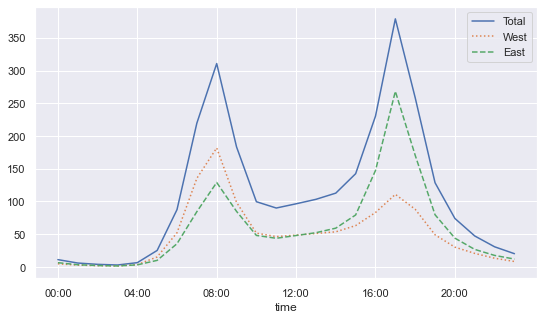

In [75]:
by_time = fbbc.groupby(fbbc.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--']);

#### Question : are they using bike for commuting or for leizure?
- to answer this, we need mean traffic data based on <font color="red">TAQ</font>[<font color="white"> day of week </font>]
- how : <font color="red">TAQ</font>[<font color="white"> fbbc.groupby(fbbc.index.dayofweek).mean() </font>]
- traffic in weekdays are much heavier

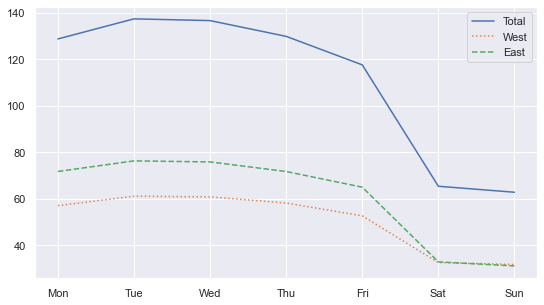

In [76]:
by_weekday = fbbc.groupby(fbbc.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--']);

#### Question : are they using bike more in summer?
- to answer this, we need mean traffic data based on <font color="red">TAQ</font>[<font color="white"> month </font>]
- how : <font color="red">TAQ</font>[<font color="white"> fbbc.groupby(fbbc.index.month).mean() </font>]
- traffic in summer is much heavier

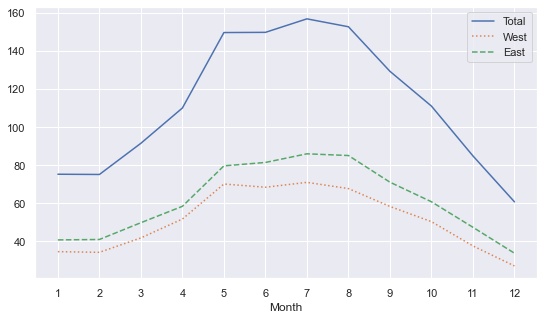

In [77]:
by_month = fbbc.groupby(fbbc.index.month).mean()
monthly_ticks = np.arange(1,13)
by_month.plot(xticks=monthly_ticks, style=['-', ':', '--'])
plt.xlabel('Month');

## 3-6. Getting data from internet
- pandas was originally initiated for processing <font color="red">TAQ</font>[<font color="white">   financial     data   </font>]
- has many functionality on handling time series data

### Example 3-6-1. Finacial data 
- ``finance-datareader`` package
    * install
        * ``pip install finance-datareader``
        * ``pip install bs4``
    * module to download finacial data from remote internet sources
        * connects to : Yahoo finance, Naver finance, ...
        * price data : KRX, NASDAQ, NYSE, AMEX, S&P500
        * symbol codes examples
             * USA: 'AAPL' (Apple), 'GOOG' (Google), 'AMZN' (Amazon), ...
             * Korea: '005930' (Samsung Electronics), '091990' (Celtrion),   
                 '066570' (LG Elec.), '005380' (Hyundai Motors), ...  
             * Index : 'KS11' (KOSPI), 'DJI' (Dow Jones), US500 (S&P500), 
             * FX : 'USD/KRX' (USD vs Korean Won), 'USD/EUR' (USD vs Euro), ...
        * ...
    * more info : http://financedata.github.io

In [78]:
# %pip install finance-datareader
import FinanceDataReader as fdr
# krx = fdr.StockListing('KRX')
# krx.head()
df = fdr.DataReader('005930', start='2016-09-01', end='2021-08-31')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-09-01,31660,31760,31260,31740,375803,-0.020370
2016-09-02,31900,32260,31760,31940,163060,0.006301
2016-09-05,31800,32300,31700,32120,167676,0.005636
2016-09-06,32140,32900,31940,32860,153203,0.023039
2016-09-07,32960,33040,32420,32420,191837,-0.013390


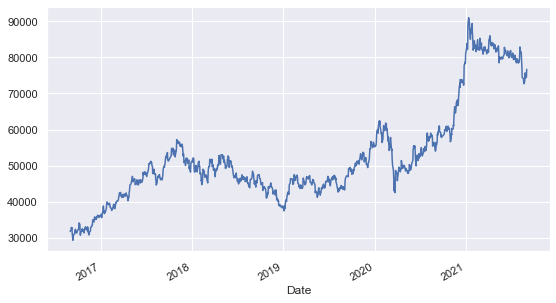

In [79]:
df.Close.plot();

#### Changing data frequency : lower (down sampling)
- ``resample()`` : *data aggregation*
- ``asfreq()`` : *data selection*

In [80]:
df = fdr.DataReader('GOOG', start='2016', end='2021')
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,741.8,743.0,744.1,731.3,3270000.0,-0.0225
2016-01-05,742.6,746.5,752.0,738.6,1950000.0,0.0010
2016-01-06,743.6,730.0,747.2,728.9,1950000.0,0.0014
2016-01-07,726.4,730.3,738.5,719.1,2960000.0,-0.0232
2016-01-08,714.5,731.5,733.2,713.0,2450000.0,-0.0164


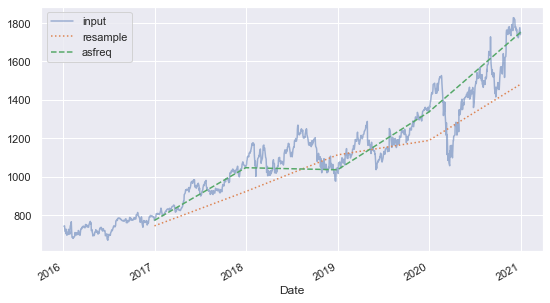

In [81]:
google = df['Close']  # google.Close
google.plot(alpha=0.5, style='-')
google.resample('BY').mean().plot(style=':')  # BY : Business Year
google.asfreq('BY').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

Notice the difference at each point
- ``resample`` reports the *average of the previous year*
- ``asfreq`` reports the *value at the end of the year*.

#### Changing data frequency : higher (up-sampling)
- ``resample()`` and ``asfreq()`` are largely equivalent
    * ``resample()`` has many more options available.
- unavailble data point when up-sampling :  empty (filled with NaN), as in the following example
    * asfreq('D') : leaves weekend prices empty    
    * asfreq('D', method='bfill') : back filling
    * asfreq('D', method='ffill') : forward filling

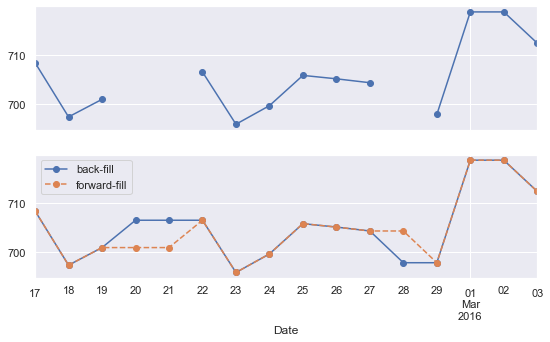

In [82]:
fig, ax = plt.subplots(2, sharex=True)  # makes 2 plots
data = google[30:43]

# ax[0] : first axes
data.asfreq('D').plot(ax=ax[0], marker='o')

# ax[1] : second axes
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

### Shifts : shifting of data in time.
- ``shift()`` *shifts the data*
- cf. ``tshift()`` *shifts the index*, not supported anymore

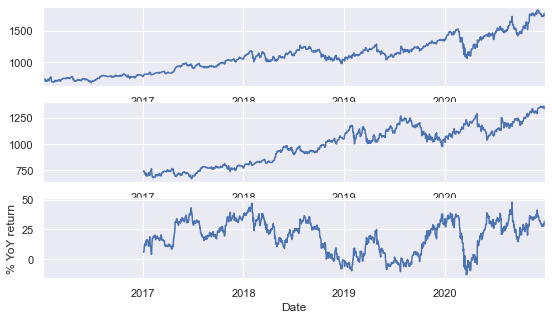

In [83]:
# apply a frequency to the data
gd = google.asfreq('D', method='pad')  # 'pad' : same as 'ffill'

fig, ax = plt.subplots(3)
gd.plot(ax=ax[0])
gd1 = gd.shift(365)
gd1.plot(ax=ax[1])

ret = (gd / gd1 - 1) * 100
ret.plot(ax=ax[2])
plt.ylabel('% YoY return');

### Rolling windows : moving average
- ``rolling()``

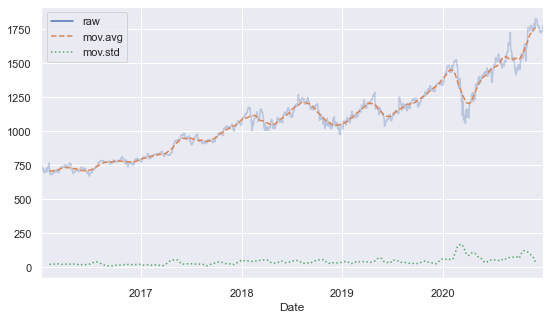

In [84]:
gr = gd.rolling(60, center=True)
df = pd.DataFrame({'raw': gd,
                     'mov.avg': gr.mean(),
                     'mov.std': gr.std()})
ax = df.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)